Load the dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign


Split the dataset

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Logistic Regression without scaling

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_unscaled = LogisticRegression(max_iter=200)
model_unscaled.fit(X_train, y_train)

y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

print("🔸 Accuracy without Min-Max scaling:", acc_unscaled)


🔸 Accuracy without Min-Max scaling: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Apply MinMax Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy after scaling

In [30]:
model_scaled = LogisticRegression(max_iter=500)
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("🔹 Accuracy after Min-Max scaling:", acc_scaled)


🔹 Accuracy after Min-Max scaling: 0.9649122807017544


Graph

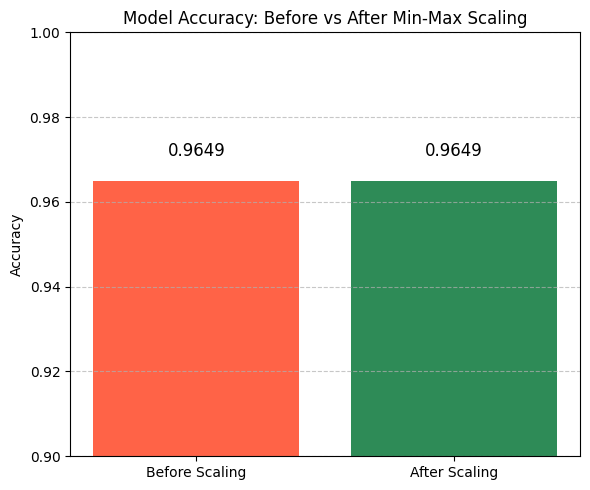

In [31]:
import matplotlib.pyplot as plt

# Assuming these values are already computed
acc_unscaled = 0.9649122807017544  # replace with your actual value
acc_scaled = 0.9649122807017544    # replace with your actual value

# Bar plot
labels = ['Before Scaling', 'After Scaling']
accuracies = [acc_unscaled, acc_scaled]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, accuracies, color=['tomato', 'seagreen'])

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             f'{yval:.4f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0.9, 1.0)  # adjust based on your accuracy range
plt.title('Model Accuracy: Before vs After Min-Max Scaling')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Without scaling
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
y_pred_knn_unscaled = knn_unscaled.predict(X_test)
acc_knn_unscaled = accuracy_score(y_test, y_pred_knn_unscaled)
print("🔸 KNN Accuracy without scaling:", acc_knn_unscaled)

# With scaling
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
acc_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)
print("🔹 KNN Accuracy with scaling:", acc_knn_scaled)


🔸 KNN Accuracy without scaling: 0.9590643274853801
🔹 KNN Accuracy with scaling: 0.9649122807017544
